In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading a specific sheet by name
df = pd.read_excel('Energy Analysis.xlsx', sheet_name='Renewable Energy')



In [21]:
df.head()

,Region,Country,ISO Code,RE or Non-RE,Main Technology,Technologies,Year,Electricity Capacity (MW),Electricity Generation (GWh),Unnamed: 9,...,Unnamed: 12,http://resourceirena.irena.org/gateway/dashboard/,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,0
0,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2000,5630.01,24954.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2001,5626.50,26187.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2002,6062.01,27345.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2003,6184.24,28927.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2004,6476.24,30633.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
## Drop unecessary columns

df = df.iloc[:, :8]

In [23]:
df.head()


,Region,Country,ISO Code,RE or Non-RE,Main Technology,Technologies,Year,Electricity Capacity (MW)
0,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2000,5630.01
1,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2001,5626.50
2,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2002,6062.01
3,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2003,6184.24
4,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2004,6476.24


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21426 entries, 0 to 21425
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     21426 non-null  object 
 1   Country                    21426 non-null  object 
 2   ISO Code                   21426 non-null  object 
 3   RE or Non-RE               21426 non-null  object 
 4   Main Technology            21426 non-null  object 
 5   Technologies               21426 non-null  object 
 6   Year                       21426 non-null  int64  
 7   Electricity Capacity (MW)  21135 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [25]:
df.shape

(21426, 8)

In [26]:
df=pd.read_excel('Energy Analysis.xlsx', sheet_name='Renewable Energy')

In [27]:
df = df.iloc[:, :9]

In [28]:
df.head(1)

,Region,Country,ISO Code,RE or Non-RE,Main Technology,Technologies,Year,Electricity Capacity (MW),Electricity Generation (GWh)
0,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2000,5630.01,24954.17


In [29]:
total_capacity_by_tech = df.groupby('Technologies')['Electricity Capacity (MW)'].sum()

In [30]:

# Convert MW to TW (1 MW = 1e-6 TW)
total_capacity_by_tech_tw = total_capacity_by_tech * 1e-6

In [31]:
## finding the share of each technology in total installed capacity

total_capacity = total_capacity_by_tech_tw.sum()
total_capacity_by_tech_tw_percentage = (total_capacity_by_tech_tw / total_capacity) * 100

In [32]:
#finding techs with lower than 2% share in total installed capacity  and combining them togather in other category

small_techs = total_capacity_by_tech_tw_percentage[total_capacity_by_tech_tw_percentage < 2]
large_techs = total_capacity_by_tech_tw_percentage[total_capacity_by_tech_tw_percentage >= 2]

In [33]:
other_capacity = small_techs.sum()

In [34]:
# merging the other category
final_data = pd.concat([large_techs, pd.Series({'Other': other_capacity})])

In [35]:
final_data




Fossil fuels                  63.814293
Nuclear                        7.437187
On-grid Solar photovoltaic     2.462798
Onshore wind energy            4.312573
Renewable hydropower          17.311001
Other                          4.662149
dtype: float64

In [36]:
# Create a DataFrame for better presentation
capacity_df_merged = pd.DataFrame({
    'Technology': final_data.index,
    'Total Capacity (TW)': final_data.values
})

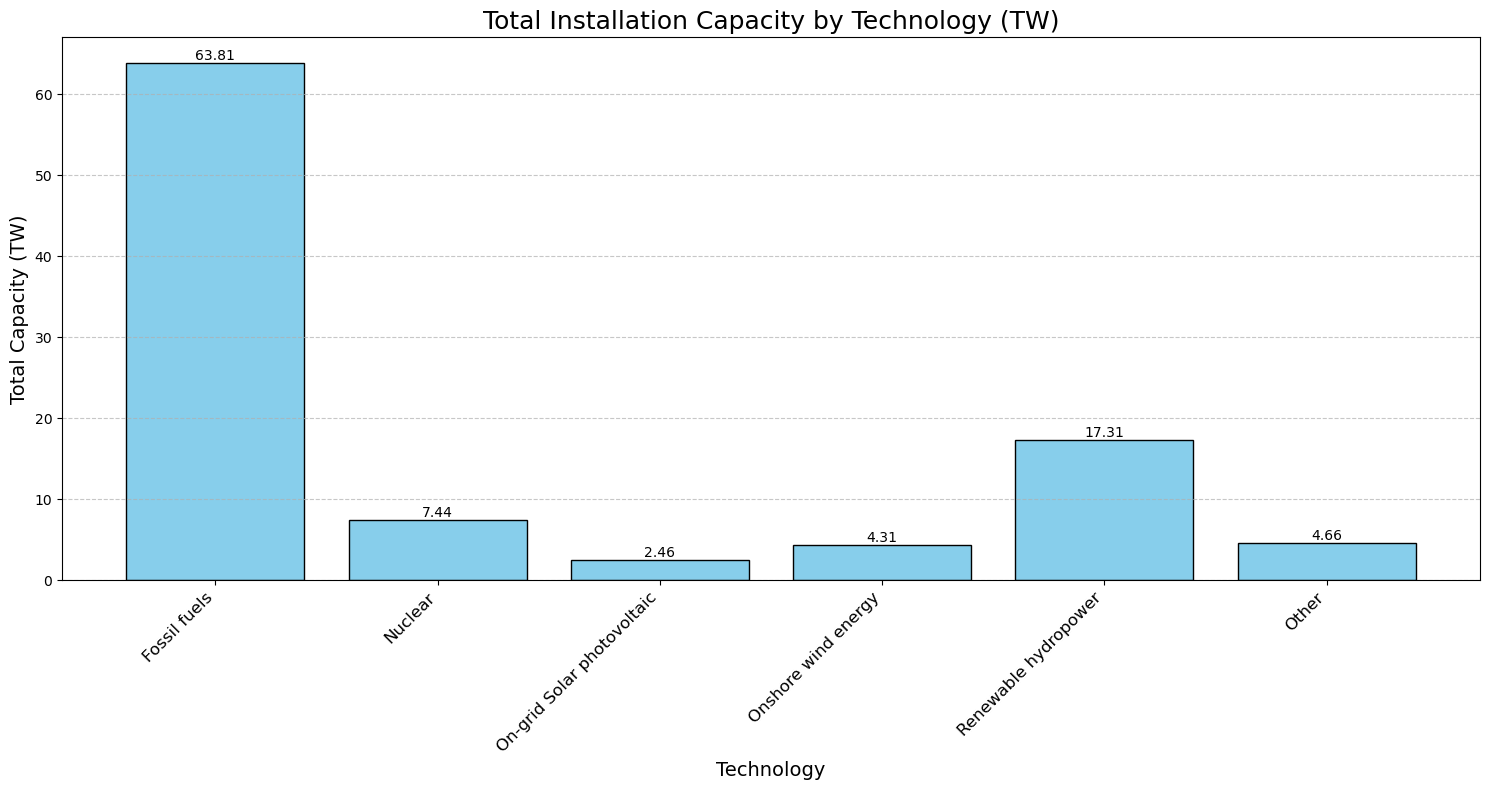

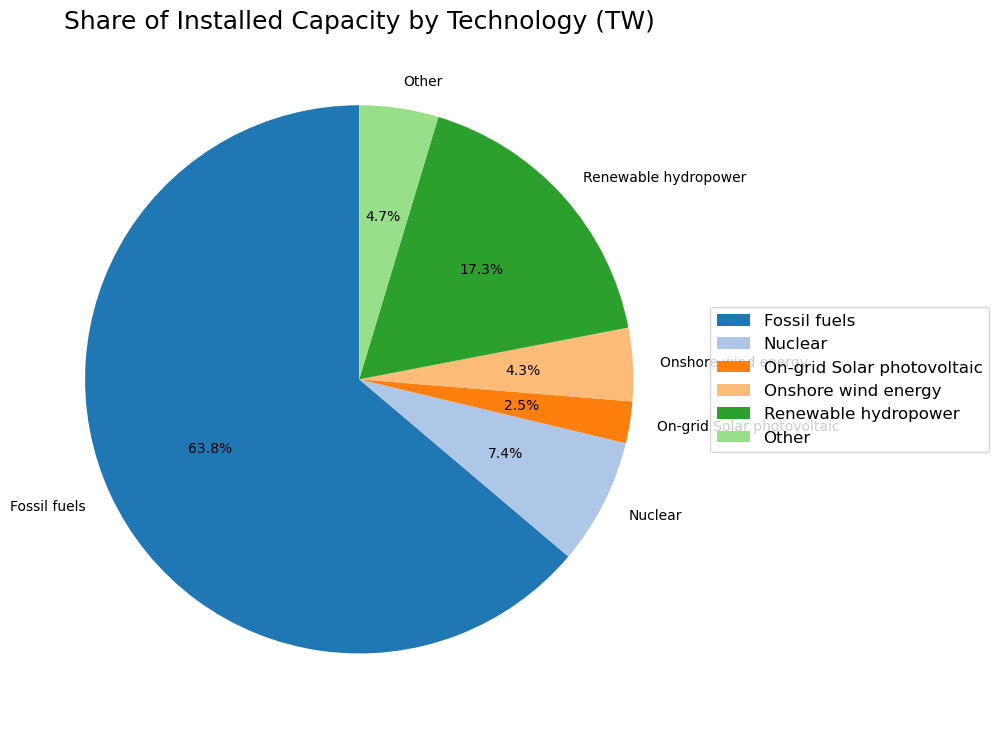

In [37]:
# Bar Graph for Installed Capacity by Technology
plt.figure(figsize=(15, 8))
bars = plt.bar(
    capacity_df_merged['Technology'], capacity_df_merged['Total Capacity (TW)'],
    color='skyblue', edgecolor='black'
)
plt.title('Total Installation Capacity by Technology (TW)', fontsize=18)
plt.xlabel('Technology', fontsize=14)
plt.ylabel('Total Capacity (TW)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels for visibility
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height(),
        f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10
    )
plt.tight_layout()
plt.show()

# Pie Chart with Merged "Other" Category
plt.figure(figsize=(10, 10))
plt.pie(
    capacity_df_merged['Total Capacity (TW)'], labels=capacity_df_merged['Technology'], 
    autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors
)
plt.title('Share of Installed Capacity by Technology (TW)', fontsize=18)
plt.legend(capacity_df_merged['Technology'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()

In [38]:

df['Electricity Capacity (TW)'] = df['Electricity Capacity (MW)'] * 1e-6

total_capacity_by_tech = df.groupby('Technologies')['Electricity Capacity (TW)'].sum()


total_capacity = total_capacity_by_tech.sum()
total_capacity_by_tech_percentage = (total_capacity_by_tech / total_capacity) * 100

small_techs = total_capacity_by_tech_percentage[total_capacity_by_tech_percentage < 2].index

df['Technologies'] = df['Technologies'].apply(lambda x: 'Other' if x in small_techs else x)


df.sample(10)


,Region,Country,ISO Code,RE or Non-RE,Main Technology,Technologies,Year,Electricity Capacity (MW),Electricity Generation (GWh),Electricity Capacity (TW)
7136,Asia,Vietnam,VNM,Renewable,Hydropower,Renewable hydropower,2002,4118.400,17317.048,4.118400e-03
19587,Oceania,Samoa,WSM,Renewable,Bioenergy,Other,2002,2.500,4.380,2.500000e-06
4771,Asia,Indonesia,IDN,Renewable,Bioenergy,Other,2006,1106.000,4903.750,1.106000e-03
21081,South and Central America,Peru,PER,Renewable,Solar energy,Other,2003,3.537,4.606,3.537000e-06
18023,North America,Mexico,MEX,Renewable,Wind energy,Onshore wind energy,2016,4051.000,10378.000,4.051000e-03
15817,Europe,Spain,ESP,Renewable,Wind energy,Onshore wind energy,2017,23119.479,49116.000,2.311948e-02
11496,Europe,Denmark,DNK,Renewable,Bioenergy,Other,2011,920.648,3077.000,9.206480e-04
20186,South and Central America,Bolivia,BOL,Renewable,Hydropower,Renewable hydropower,2014,493.760,2232.993,4.937600e-04
12392,Europe,Germany,DEU,Renewable,Geothermal energy,Other,2004,0.200,0.198,2.000000e-07
2957,Africa,Senegal,SEN,Renewable,Hydropower,Renewable hydropower,2003,0.000,337.175,0.000000e+00


In [39]:
df['Technologies'].unique()

array(['Fossil fuels', 'Renewable hydropower', 'Other',
       'Onshore wind energy', 'On-grid Solar photovoltaic', 'Nuclear'],
      dtype=object)

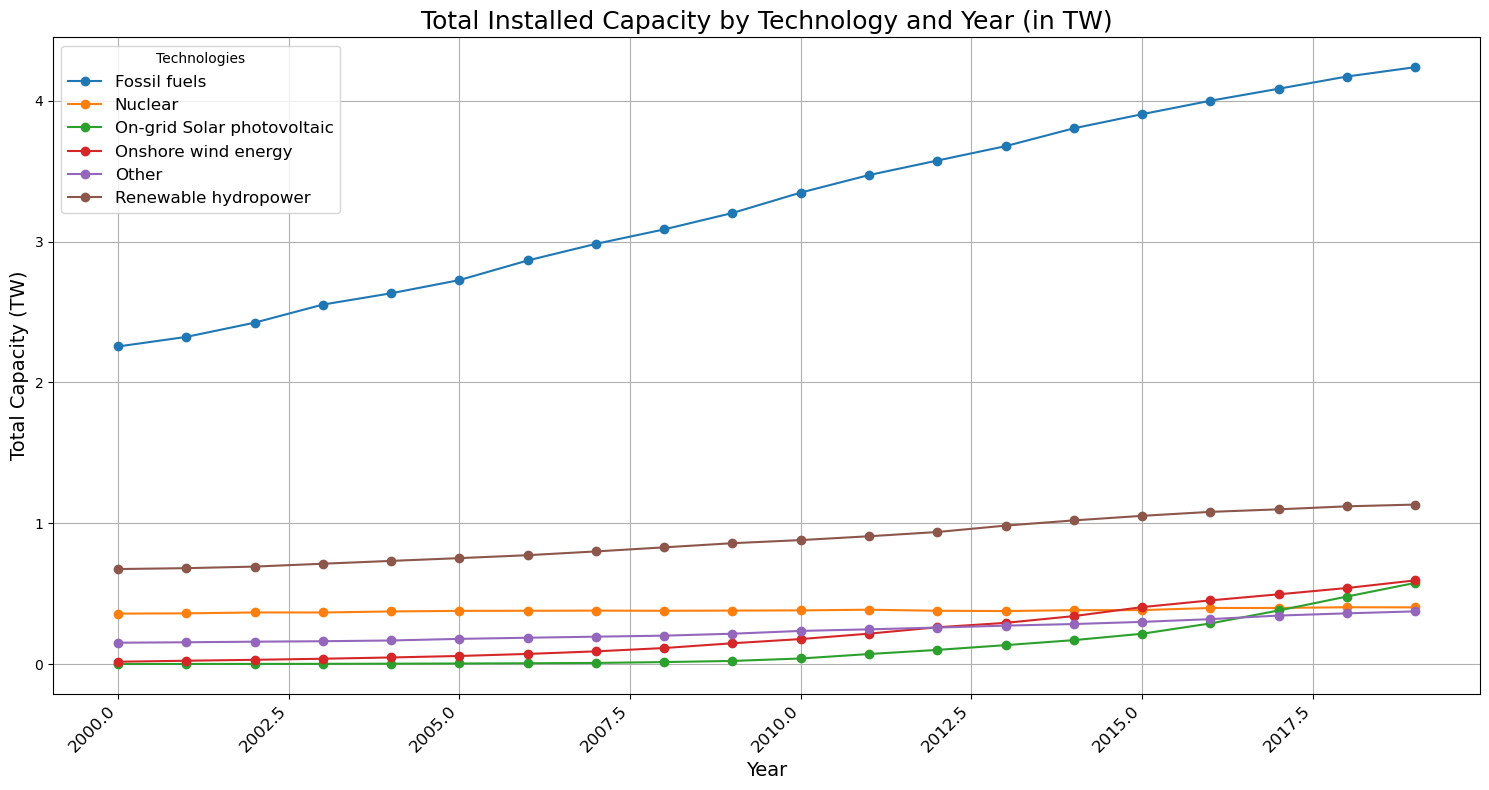

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
capacity_by_year_tech = df.groupby(['Year', 'Technologies'])['Electricity Capacity (TW)'].sum().unstack(fill_value=0)
capacity_by_year_tech.plot(kind='line', ax=plt.gca(), marker='o')

plt.title('Total Installed Capacity by Technology and Year (in TW)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Capacity (TW)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Technologies', fontsize=12)
plt.tight_layout()
plt.show()


In [41]:
total_capacity_by_tech = df.groupby('Technologies')['Electricity Capacity (TW)'].sum()

# Create a DataFrame for the total capacity by technology
total_capacity_df = total_capacity_by_tech.reset_index()

# Rename columns for better presentation
total_capacity_df.columns = ['Technology', 'Total Capacity (TW)']

# Display the table
print(total_capacity_df)

                   Technology  Total Capacity (TW)
0                Fossil fuels            65.335652
1                     Nuclear             7.614492
2  On-grid Solar photovoltaic             2.521512
3         Onshore wind energy             4.415386
4                       Other             4.773297
5        Renewable hydropower            17.723703


In [43]:
# finding total capacity by country 
total_capacity_by_country = df.groupby('Country')['Electricity Capacity (TW)'].sum()

In [44]:
total_capacity_by_country

Country
Afghanistan       0.007874
Albania           0.035375
Algeria           0.240801
American Samoa    0.000778
Andorra           0.000874
                    ...   
Venezuela         0.521446
Vietnam           0.493043
Yemen             0.025471
Zambia            0.043607
Zimbabwe          0.040814
Name: Electricity Capacity (TW), Length: 222, dtype: float64

In [45]:
#finding top 10 countries with highest total installed capacities
top_10_countries = total_capacity_by_country.sort_values(ascending=False).head(10)

In [46]:
top_10_countries

Country
United States    20.289287
China            19.998619
Japan             5.903462
India             4.712463
Russia            4.653025
Germany           3.295391
Canada            2.614147
France            2.475171
Brazil            2.297061
Italy             2.028729
Name: Electricity Capacity (TW), dtype: float64

In [47]:
df_top_10_countries = df[df['Country'].isin(top_10_countries.index)]

In [48]:
df_top_10_countries

,Region,Country,ISO Code,RE or Non-RE,Main Technology,Technologies,Year,Electricity Capacity (MW),Electricity Generation (GWh),Electricity Capacity (TW)
4252,Asia,China,CHN,Non-Renewable,Fossil fuels,Fossil fuels,2000,236900.000,1111769.000,0.236900
4253,Asia,China,CHN,Non-Renewable,Fossil fuels,Fossil fuels,2001,251880.000,1180992.000,0.251880
4254,Asia,China,CHN,Non-Renewable,Fossil fuels,Fossil fuels,2002,264348.000,1335710.000,0.264348
4255,Asia,China,CHN,Non-Renewable,Fossil fuels,Fossil fuels,2003,288150.000,1577938.000,0.288150
4256,Asia,China,CHN,Non-Renewable,Fossil fuels,Fossil fuels,2004,327100.000,1793176.000,0.327100
...,...,...,...,...,...,...,...,...,...,...
20405,South and Central America,Brazil,BRA,Renewable,Wind energy,Onshore wind energy,2015,7633.000,21625.879,0.007633
20406,South and Central America,Brazil,BRA,Renewable,Wind energy,Onshore wind energy,2016,10124.000,33489.149,0.010124
20407,South and Central America,Brazil,BRA,Renewable,Wind energy,Onshore wind energy,2017,12294.000,42391.346,0.012294
20408,South and Central America,Brazil,BRA,Renewable,Wind energy,Onshore wind energy,2018,14832.793,NaN,0.014833


In [60]:
# finding renewable and non renewable installedd capacity of shortlisted countries
grouped_data = df_top_10_countries.groupby(['Country', 'RE or Non-RE'])['Electricity Capacity (MW)'].sum().reset_index()

pivot_data = grouped_data.pivot(index='Country', columns='RE or Non-RE', values='Electricity Capacity (MW)').fillna(0)
pivot_data.columns = ['Non-Renewable Installed Capacity (MW)', 'Renewable Installed Capacity (MW)']



pivot_data['Total Installed Capacity (MW)'] = pivot_data.sum(axis=1)


final_dataset = pivot_data.reset_index()

final_dataset = final_dataset[['Country', 'Renewable Installed Capacity (MW)', 'Non-Renewable Installed Capacity (MW)', 'Total Installed Capacity (MW)']]

final_dataset = final_dataset.sort_values(by='Total Installed Capacity (MW)', ascending=False)
final_dataset.to_excel('Top_10_Countries_Renewable_NonRenewable_Summary.xlsx', index=False)


In [61]:
final_dataset

,Country,Renewable Installed Capacity (MW),Non-Renewable Installed Capacity (MW),Total Installed Capacity (MW)
9,United States,2974736.205,1.731455e+07,2.028929e+07
2,China,5876348.356,1.412227e+07,1.999862e+07
7,Japan,920979.500,4.982482e+06,5.903462e+06
5,India,1184083.352,3.528380e+06,4.712463e+06
8,Russia,969786.495,3.683238e+06,4.653025e+06
4,Germany,1209020.600,2.086370e+06,3.295391e+06
1,Canada,1654092.650,9.600540e+05,2.614147e+06
3,France,677161.322,1.798010e+06,2.475171e+06
0,Brazil,1865010.135,4.320510e+05,2.297061e+06
6,Italy,682625.100,1.346103e+06,2.028729e+06


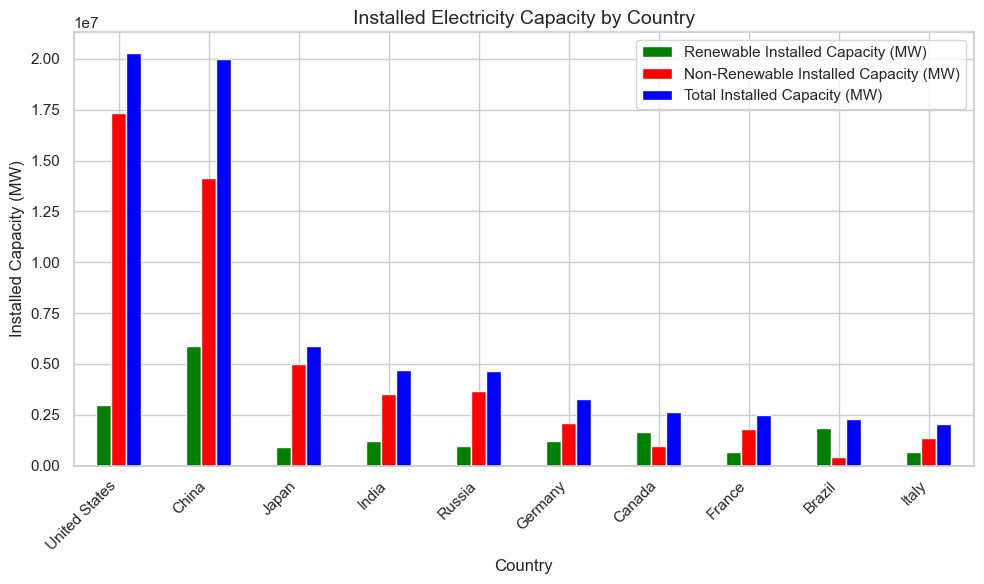

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot renewable, non-renewable, and total energy for each country
final_dataset.set_index('Country')[['Renewable Installed Capacity (MW)', 'Non-Renewable Installed Capacity (MW)', 'Total Installed Capacity (MW)']].plot(kind='bar', stacked=False, ax=ax, color=['green', 'red', 'blue'])

# Add title and labels
ax.set_title('Installed Electricity Capacity by Country', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Installed Capacity (MW)', fontsize=12)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [87]:
df['Energy Generation (TWH)'] = df['Electricity Generation (GWh)'] / 1000

In [88]:
df.head(1)

,Region,Country,ISO Code,RE or Non-RE,Main Technology,Technologies,Year,Electricity Capacity (MW),Electricity Generation (GWh),Electricity Capacity (TW),Electricity Generation (TWH),Energy Generation (TWH)
0,Africa,Algeria,DZA,Non-Renewable,Fossil fuels,Fossil fuels,2000,5630.01,24954.17,0.00563,0.024954,24.95417


In [89]:
top_10_countries = df.groupby('Country')['Energy Generation (TWH)'].sum().nlargest(10).index

In [90]:
df_top_10 = df[df['Country'].isin(top_10_countries)]


pivot_data = df_top_10.pivot_table(
    index='Year',
    columns='Country',
    values='Energy Generation (TWH)',
    aggfunc='sum',
    fill_value=0
)
pivot_data = pivot_data.drop([2019, 2018], axis=0)

In [91]:
pivot_data

Country,Brazil,Canada,China,France,Germany,India,Japan,Russia,South Korea,United States
Year,,,,,,,,,,
2000,348.921116,605.707,1354.092105,539.954939,576.543,563.473533,1067.818,876.800436,290.126000,4052.667000
2001,328.519643,589.891,1479.222112,549.530761,586.406,568.409388,1050.233,890.358297,310.958000,3865.307000
2002,345.679002,601.269,1652.280810,559.064739,586.694,587.687843,1068.065,890.345233,331.882000,4051.120000
2003,364.340015,589.653,1908.600160,566.838640,608.779,610.616751,1058.883,915.340675,345.192000,4081.764000
2004,387.452593,599.976,2201.125608,574.054409,617.469,646.054761,1088.467,930.716688,368.162000,4174.856000
2005,403.030950,620.572,2499.287052,576.061877,622.579,680.192368,1108.840,951.966082,389.390000,4294.368000
2006,419.383676,611.084,2863.285067,574.870645,639.492,721.773348,1112.688,994.136082,404.021000,4300.831000
2007,445.148992,628.254,3276.311430,569.768417,640.578,776.359363,1141.865,1013.748192,427.316000,4349.841000
2008,462.886937,631.457,3455.394855,573.806773,640.406,820.379070,1108.270,1038.759280,446.429000,4368.262000


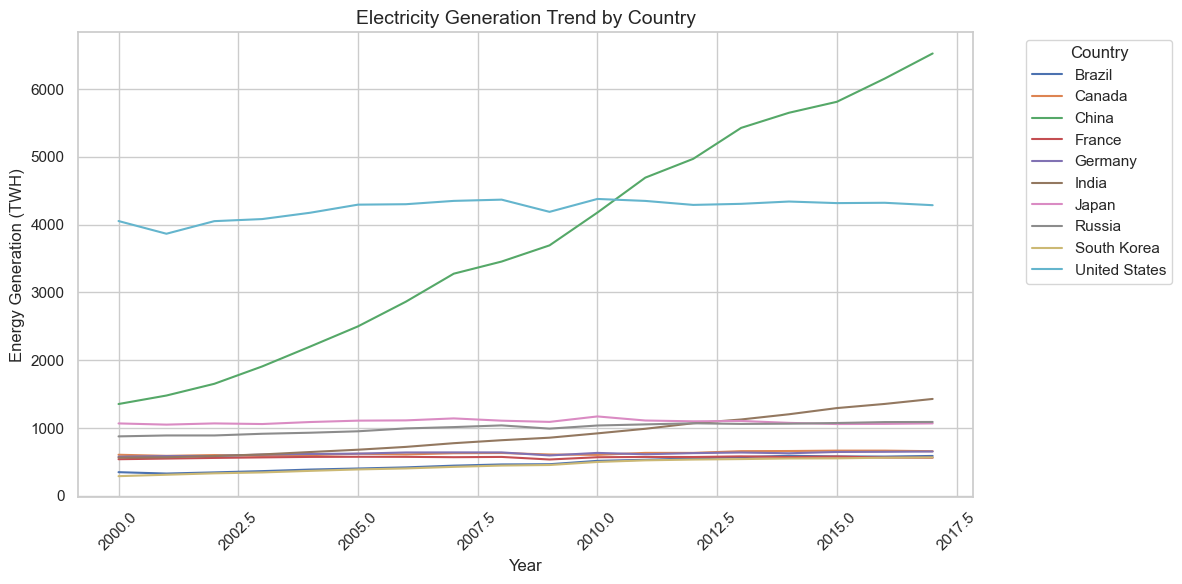

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Plot the line graph
plt.figure(figsize=(12, 6))

# Plot each country's electricity generation trend over the years
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], label=country)

# Add title and labels
plt.title('Electricity Generation Trend by Country', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Generation (TWH)', fontsize=12)

# Add a legend
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
